In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt

from aemodes.utils.dataset import load_dataset

In [ ]:
data_path = '/scratch/gpfs/nc1514/aemodes/data/co2_250_detector.pkl'
model_path = '/scratch/gpfs/nc1514/aemodes/model/big_mode_v1-5.pt'

In [ ]:
model = torch.load(
    model_path, 
    weights_only=False, 
    map_location=device
)
model.eval()
print("Model loaded")

Model loaded


In [ ]:
train_dataset, valid_dataset = load_dataset(data_path)

In [ ]:
mean, std = 0.0523, 0.0654

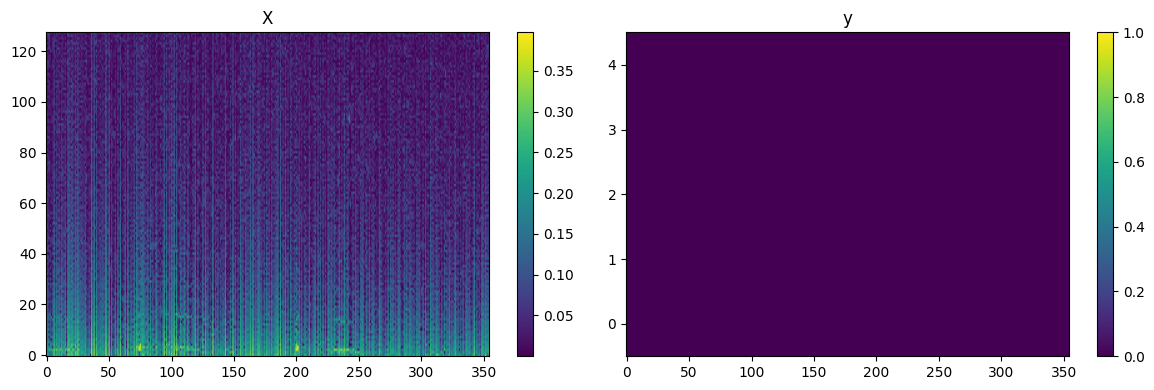

In [29]:
idx = 1055

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(train_dataset[idx]['X'][0].numpy(), aspect='auto', origin='lower')
plt.colorbar()
plt.title('X')

plt.subplot(1, 2, 2)
plt.imshow(train_dataset[idx]['y'].numpy(), aspect='auto', origin='lower', interpolation='none', vmin=0, vmax=1)
plt.colorbar()
plt.title('y')

plt.tight_layout()
plt.show()

In [28]:
inp = train_dataset[idx]['X'].unsqueeze(1).to(device)
inp = (inp - mean) / std
with torch.no_grad():
    out = model(inp)
out = out[0]
out = torch.sigmoid(out)  > 0.2
out = out.squeeze(1).cpu().numpy()

In [15]:
ae_true = train_dataset[idx]['y'].numpy().sum(axis=0) > 0
ae_true = ae_true[None, :]
overlap = out[0][0] * ae_true

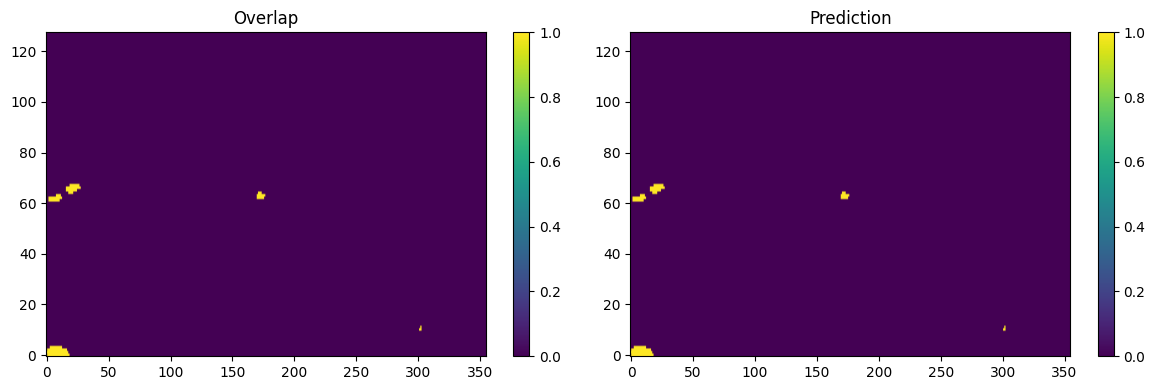

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(overlap, aspect='auto', origin='lower', vmin=0, vmax=1)
plt.colorbar()
plt.title('Overlap')

plt.subplot(1, 2, 2)
plt.imshow(out[0][0], aspect='auto', origin='lower')
plt.colorbar()
plt.title('Prediction')

plt.tight_layout()
plt.show()